In [1]:
import pandas as pd
import requests


In [2]:

base_url = 'https://api.acleddata.com/'
country = "Sudan"
email = "mohamed.omer@undp.org"
api_key = "eU*u2SEKePnQiv9d!qXI"



In [3]:
all_data = []  # To store data from all API requests
limit = 2000  # Number of records per request
offset = 0  # Used to paginate
base_url = f"https://api.acleddata.com/acled/read?key={api_key}&email={email}"

# Params for the API request
params = {
    'country': country,
    'limit': limit,
    'offset': offset
}



In [4]:
response=requests.get(base_url, params=params)
response_json=response.json()

In [5]:
data=response_json['data']
all_data.extend(data)
pd.DataFrame(all_data)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,SUD31165,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Ed Al Ghubash,14.9141,33.3874,1,Al Mashhad Al Sudani,National,"On 1 November 2024, SAF airstrikes targeted RS...",0,,1730764892
1,SUD31166,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Khartoum - Eid Hussain,15.4788,32.5618,1,Al Mashhad Al Sudani; Al Taghyeer (Sudan); Sud...,New media-National,"On 1 November 2024, SAF drone strikes targeted...",2,,1730764892
2,SUD31167,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Khartoum - Al Mogran,15.6027,32.5095,1,Al Mashhad Al Sudani,National,"On 1 November 2024, SAF drone strikes targeted...",0,,1730764892
3,SUD31168,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Rapid Support Forces,Darfur Arab Militia (Sudan),Rebel group,...,Abu Shouk IDP Camp,13.6740,25.3685,1,WikiLeaks - El Fasher 'Darfur News',New media,"On 1 November 2024, RSF, backed by a militia (...",2,,1730764892
4,SUD31169,2024-11-01,2024,1,Political violence,Battles,Armed clash,Rapid Support Forces,Darfur Arab Militia (Sudan),Rebel group,...,El Fasher,13.6264,25.3559,1,WikiLeaks - El Fasher 'Darfur News',New media,"On 1 November 2024, clashes between RSF, backe...",10,,1730764892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SUD28961,2024-07-24,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Umm Simeima Sharbik,13.5938,30.9284,1,Al Mashhad Al Sudani; Al Rakoba; Twitter,New media-National,"On 24 July 2024, SAF airstrikes targeted RSF p...",4,,1729632853
1996,SUD28964,2024-07-24,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Jabal Moya,13.4941,33.3229,1,Alnilin,National,"On 24 July 2024, SAF airstrikes targeted RSF i...",0,,1729632853
1997,SUD29024,2024-07-24,2024,1,Political violence,Violence against civilians,Attack,Rapid Support Forces,,Rebel group,...,El Hasahisa,14.7349,33.2973,1,Al Rakoba; Twitter,New media-National,"On 24 July 2024, RSF killed a former pro-revol...",1,,1730180200
1998,SUD28945,2024-07-23,2024,2,Political violence,Violence against civilians,Abduction/forced disappearance,Rapid Support Forces,,Rebel group,...,Um Algura,14.4389,33.7763,2,Sudan Akhbar,National,"Around 23 July 2024 (as reported), RSF detaine...",0,,1722291579


In [6]:
from datetime import datetime
import configparser
config = configparser.ConfigParser()
config.read('config.txt')
email = config['API']['email']
api_key = config['API']['api_key']
country = config['API']['country']
start_date = config['API']['start_date']
end_date = datetime.now().strftime('%Y-%m-%d')
event_date = f"{start_date}|{end_date}"

all_data = []  # To store data from all API requests
limit = 20000  # Number of records per request
offset = 0  # Used to paginate
base_url = f"https://api.acleddata.com/acled/read"
# Params for the API request

# Define the parameters
params = {
    'key': api_key,
    'email': email,
    'country': country,
    'event_date': event_date,  # Use pipe separator in event_date
    'event_date_where': 'BETWEEN',
    'limit': limit,
    'offset': offset
}

response=requests.get(base_url, params=params)
response_json=response.json()
data=response_json['data']
all_data.extend(data)
pd.DataFrame(all_data)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,SUD31165,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Ed Al Ghubash,14.9141,33.3874,1,Al Mashhad Al Sudani,National,"On 1 November 2024, SAF airstrikes targeted RS...",0,,1730764892
1,SUD31166,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Khartoum - Eid Hussain,15.4788,32.5618,1,Al Mashhad Al Sudani; Al Taghyeer (Sudan); Sud...,New media-National,"On 1 November 2024, SAF drone strikes targeted...",2,,1730764892
2,SUD31167,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),,State forces,...,Khartoum - Al Mogran,15.6027,32.5095,1,Al Mashhad Al Sudani,National,"On 1 November 2024, SAF drone strikes targeted...",0,,1730764892
3,SUD31168,2024-11-01,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Rapid Support Forces,Darfur Arab Militia (Sudan),Rebel group,...,Abu Shouk IDP Camp,13.6740,25.3685,1,WikiLeaks - El Fasher 'Darfur News',New media,"On 1 November 2024, RSF, backed by a militia (...",2,,1730764892
4,SUD31169,2024-11-01,2024,1,Political violence,Battles,Armed clash,Rapid Support Forces,Darfur Arab Militia (Sudan),Rebel group,...,El Fasher,13.6264,25.3559,1,WikiLeaks - El Fasher 'Darfur News',New media,"On 1 November 2024, clashes between RSF, backe...",10,,1730764892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11269,SUD19583,2023-04-02,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Sudan),Resistance Committees (Sudan),Protesters,...,Wad Medani,14.3983,33.5477,1,Hala haya 5,New media,"On 2 April 2023, demonstrators responded to ca...",0,crowd size=no report,1722291575
11270,SUD19510,2023-04-01,2023,1,Political violence,Violence against civilians,Attack,Darfur Communal Militia (Sudan),,Identity militia,...,Saraf Omra,13.4771,23.3117,2,Alintibaha; Radio Dabanga,National,"On 1 April 2023, seven militants on three moto...",0,,1681225751
11271,SUD19525,2023-04-01,2023,1,Demonstrations,Riots,Violent demonstration,Rioters (Sudan),BC: Beja Congress; Beja Ethnic Militia (Sudan),Rioters,...,Port Sudan,19.6148,37.2225,2,Al Taghyeer (Sudan); Alhamish Voice; Alintibah...,New media-National,"On 1 April 2023, dozens of Beja Congress membe...",0,crowd size=dozens,1681225751
11272,SUD19566,2023-04-01,2023,1,Demonstrations,Riots,Violent demonstration,Rioters (Sudan),BC: Beja Congress; Beja Ethnic Militia (Sudan),Rioters,...,Aroma,15.8109,36.1367,2,Al Taghyeer (Sudan); Alhamish Voice; Alintibah...,National,"On 1 April 2023, dozens of Beja Congress membe...",0,crowd size=dozens,1681225751


In [7]:
import configparser
import requests
import pandas as pd
from datetime import datetime

def fetch_acled_data():
    # Read the configuration file
    config = configparser.ConfigParser()
    config.read('config.txt')
    
    # Extract necessary parameters from config
    email = config['API']['email']
    api_key = config['API']['api_key']
    country = config['API']['country']
    start_date = config['API']['start_date']
    
    # Get the current date in 'yyyy-mm-dd' format for the end_date
    end_date = datetime.now().strftime('%Y-%m-%d')
    
    # Create the event_date string using the pipe separator
    event_date = f"{start_date}|{end_date}"
    
    all_data = []  # To store data from all API requests
    limit = 20000  # Number of records per request
    offset = 0  # Used to paginate
    base_url = "https://api.acleddata.com/acled/read"
    
    # Define the parameters
    params = {
        'key': api_key,
        'email': email,
        'country': country,
        'event_date': event_date,  # Use pipe separator in event_date
        'event_date_where': 'BETWEEN',
        'limit': limit,
        'offset': offset
    }

    # Send the GET request
    response = requests.get(base_url, params=params)
    
    # Raise exception if the request fails
    response.raise_for_status()
    
    # Parse the response JSON
    response_json = response.json()
    data = response_json['data']
    
    # Extend all_data with the fetched data
    all_data.extend(data)
    
    # Return the data as a DataFrame
    return pd.DataFrame(all_data)

# Example of calling the function
df = fetch_acled_data()
print(df)


      event_id_cnty  event_date  year time_precision       disorder_type  \
0          SUD31165  2024-11-01  2024              1  Political violence   
1          SUD31166  2024-11-01  2024              1  Political violence   
2          SUD31167  2024-11-01  2024              1  Political violence   
3          SUD31168  2024-11-01  2024              1  Political violence   
4          SUD31169  2024-11-01  2024              1  Political violence   
...             ...         ...   ...            ...                 ...   
11269      SUD19583  2023-04-02  2023              1      Demonstrations   
11270      SUD19510  2023-04-01  2023              1  Political violence   
11271      SUD19525  2023-04-01  2023              1      Demonstrations   
11272      SUD19566  2023-04-01  2023              1      Demonstrations   
11273      SUD19573  2023-04-01  2023              1      Demonstrations   

                       event_type                     sub_event_type  \
0      Explosio

In [8]:
df = fetch_acled_data()  



In [52]:
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df['event_date'] = pd.to_datetime(df['event_date'])
df['month'] = df['event_date'].dt.month
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['year'] = df['event_date'].dt.year
df['month_year'] = df['event_date'].dt.to_period('M')
df_last_month = df[df['month_year'] == df['month_year'].max()]
df_last_month_1 = df[df['month_year'] == df['month_year'].max()-1]
fatilities_prec =(df_last_month['fatalities'].sum() / df_last_month_1['fatalities'].sum() - 1)
round(fatilities_prec, 2)*100
df['admin1'].nunique()
total_Violence_against_civilians=df.groupby('event_type')['event_id_cnty'].count().reset_index().loc[lambda x: x['event_type'] == "Violence against civilians", 'event_id_cnty']
print(total_Violence_against_civilians)

5    2057
Name: event_id_cnty, dtype: int64


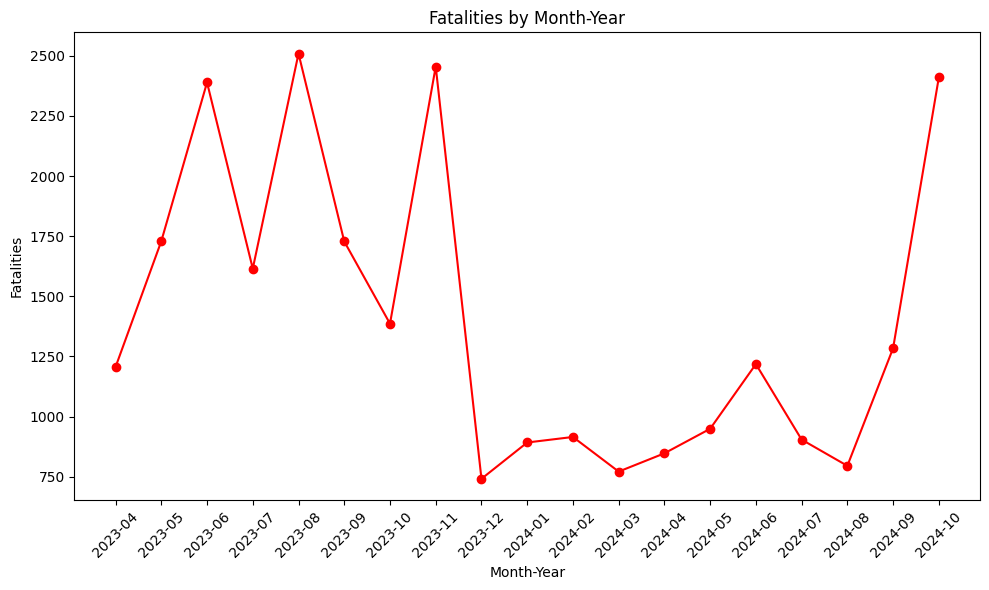

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df['event_date'] = pd.to_datetime(df['event_date'])
df['month_year'] = df['event_date'].dt.to_period('M')

# Group by month_year and sum fatalities
monthly_fatalities = df.groupby('month_year')['fatalities'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_fatalities['month_year'].astype(str), monthly_fatalities['fatalities'], marker='o', color='red')
plt.xlabel('Month-Year')
plt.ylabel('Fatalities')
plt.title('Fatalities by Month-Year')
plt.xticks(rotation=45)
plt.gca().patch.set_alpha(0)  # Set the background to transparent
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()
